# Linear Regression models

Importing all neccesary libraries:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import math

Formula for points generation: *y = b1 * x + b0 + e*, where e ~ N(u, sigma)

Generating linear equation **x** values, coefficients **b** and random errors **e**:

In [2]:
np.random.seed()

x = np.arange(-10, 10, .1)

b = np.array([round(np.random.uniform(-2, 2), 2) for i in range(2)])

mean = round(np.random.uniform(-2, 2), 2)
deviation = round(np.random.uniform(1, 4), 2)
e = np.array([np.random.normal(mean, deviation) for i in range(len(x))])

print("Generated equation: y={0}x".format(b[1]) + "{:+}+e".format(b[0]) + ", where e ~ N({0}, {1})".format(mean, deviation))

Generated equation: y=-0.75x-1.95+e, where e ~ N(-0.01, 2.37)


There are two different methods to find the regression line:
1. *using matrix calculations*
2. *using gradient descent*

Calculating target **y** values by using **method 1**:

In [3]:
_x = np.array([[1 for i in range(len(x))], x.tolist()]).T
y = np.dot(_x, b) + e

Calculating target **y** values by using **method 2**:

In [4]:
y = [b[1] * i + b[0] + j for i, j in zip(x, e)]

Drawing generated points:

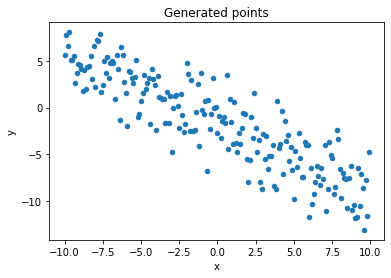

In [5]:
plt.title("Generated points")
plt.scatter(x, y, s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Some functions needed for further calculations:

In [6]:
def MSE(y_target, y_pred): # mean square error
    assert len(y_target) == len(y_pred)
    return sum([(y1 - y2)**2 for y1, y2 in zip(y_target, y_pred)])

def b0_grad(y_target, y_pred): # gradient for b0 param
    assert len(y_target) == len(y_pred)
    return -2 * sum([(y1 - y2) for y1, y2 in zip(y_target, y_pred)])

def b1_grad(y_target, y_pred, x): # gradient for b1 param
    assert len(y_target) == len(y_pred)
    assert len(y_target) == len(x)
    return -2 * sum([x1 * (y1 - y2) for y1, y2, x1 in zip(y_target, y_pred, x)])

def determination_coeff(y, b_pred): # model evaluation
    y_mean = sum(y) / len(y)
    y_pred = [b_pred[1] * i + b_pred[0] for i in x]
    r = 1 - (MSE(y, y_pred) / MSE(y, [y_mean for i in range(len(y))]))
    return round(r, 5)

def print_result(y, b_pred, r):
    print("Predicted b1:", b_pred[1], "\nPredicted b0:", b_pred[0])
    print("Determination coefficient R^2: {0}".format(r))

Finding the target regression line using matrix calculations (**method 1**):

In [7]:
_x_t = _x.T
b_pred_1 = np.dot(np.dot(np.linalg.inv(np.dot(_x_t, _x)), _x_t), y)
b_pred_1 = [round(elem, 3) for elem in b_pred_1]
r_1 = determination_coeff(y, b_pred_1)
print_result(y, b_pred_1, r_1)

Predicted b1: -0.761 
Predicted b0: -1.69
Determination coefficient R^2: 0.77617


Finding the target regression line using gradient descent (**method 2**):

In [8]:
save_step = 50
epoсhs = 100000
alpha = 0.00001
stop_diff = 0.001

b_history = []
errors = [math.inf]
b_pred_2 = np.array([np.random.uniform(-5, 5) for i in range(2)])

for i in range(epoсhs):
    y_pred = [b_pred_2[1] * i + b_pred_2[0] for i in x]
    errors.append(MSE(y, y_pred))
    if abs(errors[-1] - errors[-2]) < stop_diff:
        break
    b_pred_2[0] -= alpha * b0_grad(y, y_pred)
    b_pred_2[1] -= alpha * b1_grad(y, y_pred, x)
    if i % save_step == 20:
        b_history.append([b_pred_2[0], b_pred_2[1]])

completed_epochs = i + 1
b_history.append([b_pred_2[0], b_pred_2[1]])
b_pred_2 = [round(elem, 3) for elem in b_pred_2]
r_2 = determination_coeff(y, b_pred_2)
print("Completed {} epochs".format(completed_epochs))
print_result(y, b_pred_2, r_2)
#print("Saved temporary points:", len(b_history))

Completed 1366 epochs
Predicted b1: -0.761 
Predicted b0: -1.665
Determination coefficient R^2: 0.77615


Illustration of mean square error values during training model by using gradient descent:

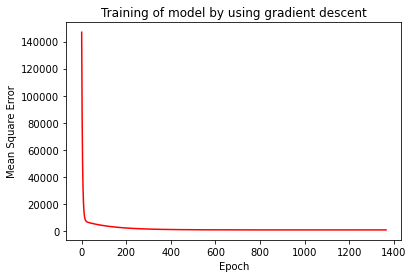

In [9]:
plt.plot([i for i in range(completed_epochs)], errors[1:], 'r')
plt.title("Training of model by using gradient descent")
plt.xlabel("Epoch")
plt.ylabel("Mean Square Error")
#plt.xlim(0, 200)
#plt.ylim(0, 1000)
plt.show()

Showing the result lines:

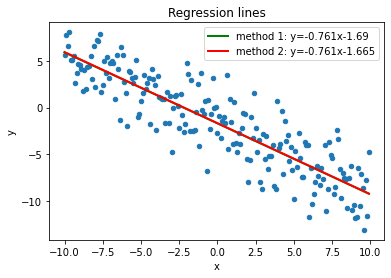

In [10]:
plt.scatter(x, y, s=20)
plt.plot(x, [b_pred_1[1] * i + b_pred_1[0] for i in x], "g", linewidth=2, label="method 1: y="+str(b_pred_1[1])+"x{:+}".format(b_pred_1[0]))
plt.plot(x, [b_pred_2[1] * i + b_pred_2[0] for i in x], "r", linewidth=2, label="method 2: y="+str(b_pred_2[1])+"x{:+}".format(b_pred_2[0]))
plt.title("Regression lines")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Creating animation of finding the target line by using gradient descent:

In [11]:
animation_time = 3000 # ms

def animate(j):
    line.set_data(x, [b_history[j][1] * i + b_history[j][0] for i in x])

fig, ax = plt.subplots()
plt.scatter(x, y, s=20)
plt.title("Searching the regression line by gradient descent")
plt.xlabel("x")
plt.ylabel("y")
line, = ax.plot(x, [b_history[0][1] * i + b_history[0][0] for i in x], "r", linewidth=2)

ani = animation.FuncAnimation(fig, animate, frames=range(len(b_history)), interval=animation_time/len(b_history), repeat=True)
plt.close()
HTML(ani.to_html5_video())

Table for comparing the results given by two methods:

In [12]:
df = pd.DataFrame([["matrix", b_pred_1[0], b_pred_1[1], r_1], 
                   ["gradient", b_pred_2[0], b_pred_2[1], r_2]], 
                  columns = ["method", "b0", "b1", "R^2"])
HTML(df.to_html(index=False))

method,b0,b1,R^2
matrix,-1.690,-0.761,0.77617
gradient,-1.665,-0.761,0.77615
